# Bike Share Dataset (Hourly)

Dataset source:
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset# 
    
    
 Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


Attribute Information:



- instant: record index 
- dteday : date 
- season : season (1:winter, 2:spring, 3:summer, 4:fall) 
- yr : year (0: 2011, 1:2012) 
- mnth : month ( 1 to 12) 
- hr : hour (0 to 23) 
- holiday : weather day is holiday or not (extracted from [Web Link]) 
- weekday : day of the week 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. 
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) 
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) 
- hum: Normalized humidity. The values are divided to 100 (max) 
- windspeed: Normalized wind speed. The values are divided to 67 (max) 
- casual: count of casual users 
- registered: count of registered users 
- cnt: count of total rental bikes including both casual and registered 
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import os
import warnings
warnings.filterwarnings("ignore")

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}


sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']
#np.set_printoptions(precision=3)
from IPython.display import display, HTML

In [2]:
df=pd.read_csv('hour.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
df.rename(columns={'yr':'year',
                   'mnth':'month',
                   'hr':'hour',
                   'instant':'id',
                  'dteday':'date',
                   'weathersit':'weather_cond',
                   'hum':'humidity',
                   'cnt':'count'
                   
                   
                   }, inplace=True)

In [7]:
df.head()

,id,date,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
df['date']=pd.to_datetime(df.date)

df[['season','year','month','hour','holiday','weekday','workingday','weather_cond']]=df[['season','year','month','hour','holiday','weekday','workingday','weather_cond']].astype('category')

# for var in categoricalFeatureNames:
    # data[var] = data[var].astype("category")

In [9]:
df.dtypes

id                       int64
date            datetime64[ns]
season                category
year                  category
month                 category
hour                  category
holiday               category
weekday               category
workingday            category
weather_cond          category
temp                   float64
atemp                  float64
humidity               float64
windspeed              float64
casual                   int64
registered               int64
count                    int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
id              17379 non-null int64
date            17379 non-null datetime64[ns]
season          17379 non-null category
year            17379 non-null category
month           17379 non-null category
hour            17379 non-null category
holiday         17379 non-null category
weekday         17379 non-null category
workingday      17379 non-null category
weather_cond    17379 non-null category
temp            17379 non-null float64
atemp           17379 non-null float64
humidity        17379 non-null float64
windspeed       17379 non-null float64
casual          17379 non-null int64
registered      17379 non-null int64
count           17379 non-null int64
dtypes: category(8), datetime64[ns](1), float64(4), int64(4)
memory usage: 1.3 MB


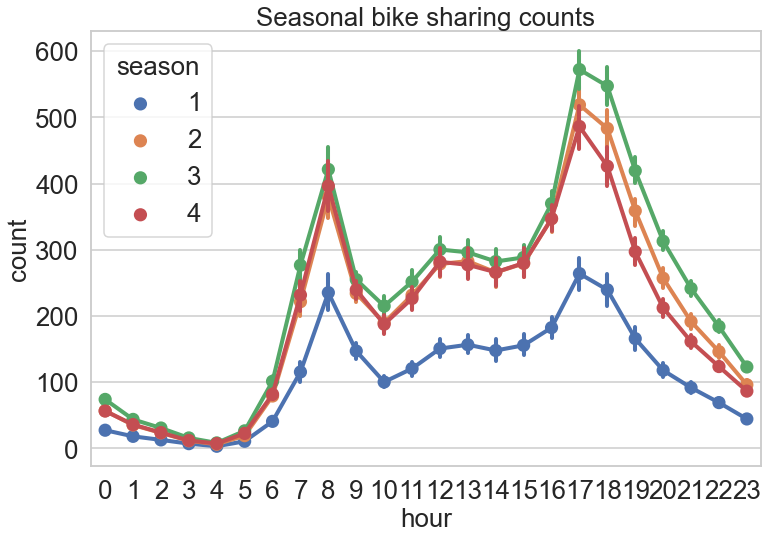

In [11]:
fig, ax=plt.subplots()
sns.pointplot(data=df[['hour',
                      'count',
                      'season']],
                      x='hour', y='count',
                       hue='season', ax=ax
                      
                      )
plt.title('Seasonal bike sharing counts')
plt.show()

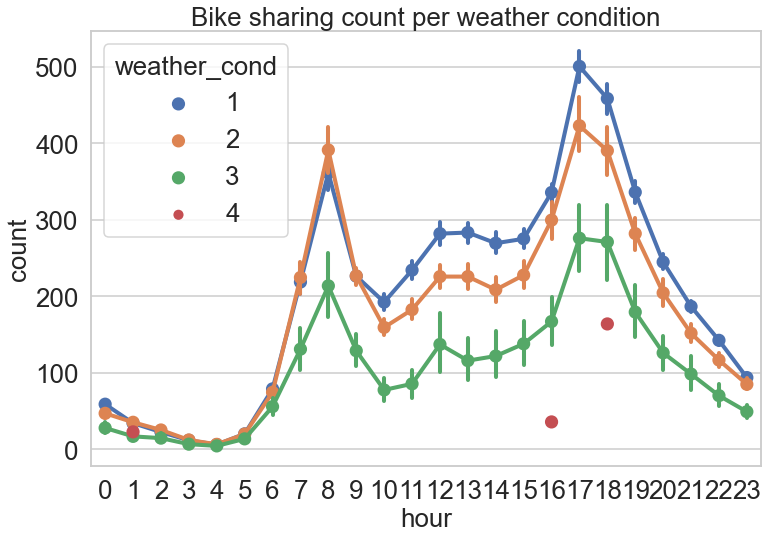

In [12]:
fig, ax=plt.subplots()
sns.pointplot(data=df[['hour',
                      'count',
                      'weather_cond']],
                      x='hour', y='count',
                       hue='weather_cond', ax=ax
                      
                      )

plt.title('Bike sharing count per weather condition')
plt.show()

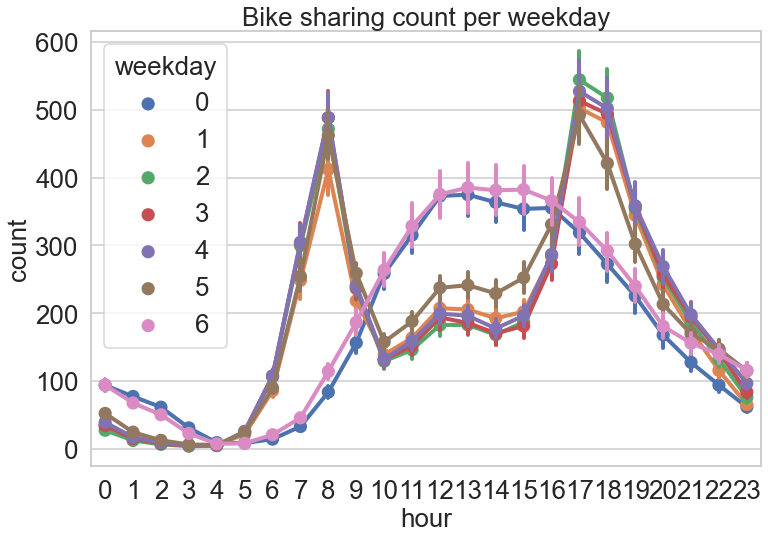

In [13]:
fig, ax=plt.subplots()
sns.pointplot(data=df[['hour',
                      'count',
                      'weekday']],
                      x='hour', y='count',
                       hue='weekday', ax=ax
                      
                      )

plt.title('Bike sharing count per weekday')
plt.show()

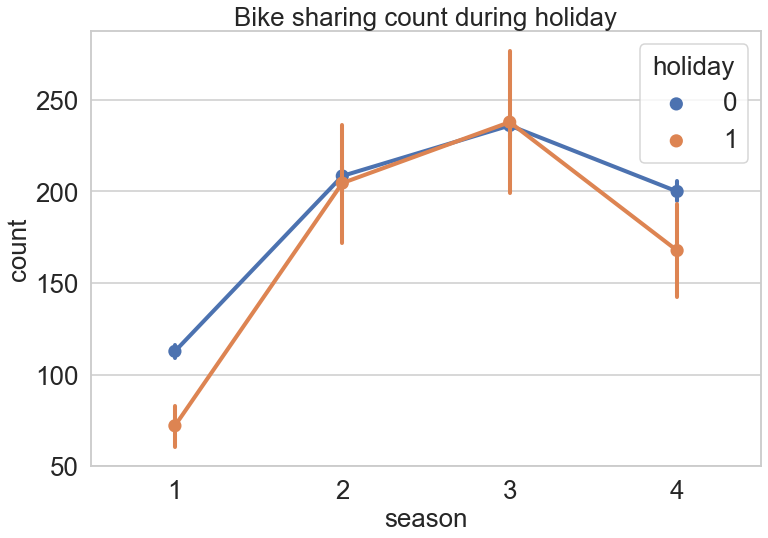

In [14]:
fig, ax=plt.subplots()
sns.pointplot(data=df[['season',
                      'count',
                      'holiday']],
                      x='season', y='count',
                       hue='holiday', ax=ax
                      
                      )

plt.title('Bike sharing count during holiday')
plt.show()

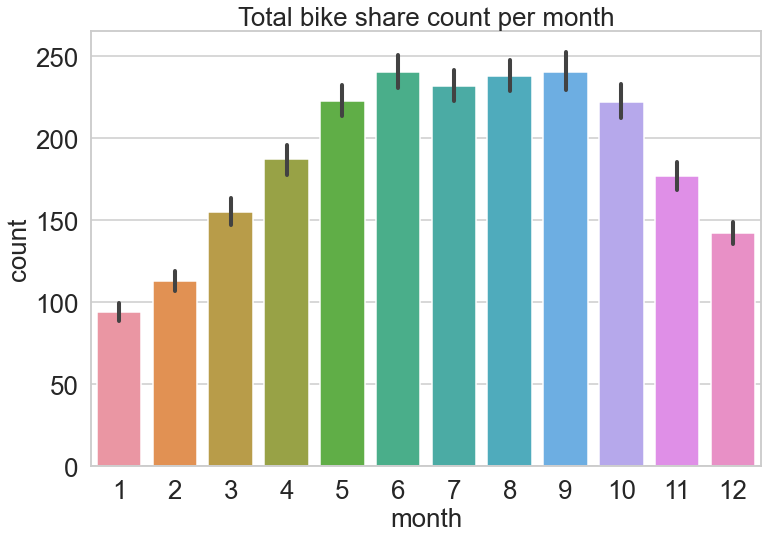

In [15]:
fig,ax=plt.subplots()
sns.barplot(data=df[['month', 'count']],
                    x='month', y='count',
                    )
ax.set_title('Total bike share count per month')

plt.show()

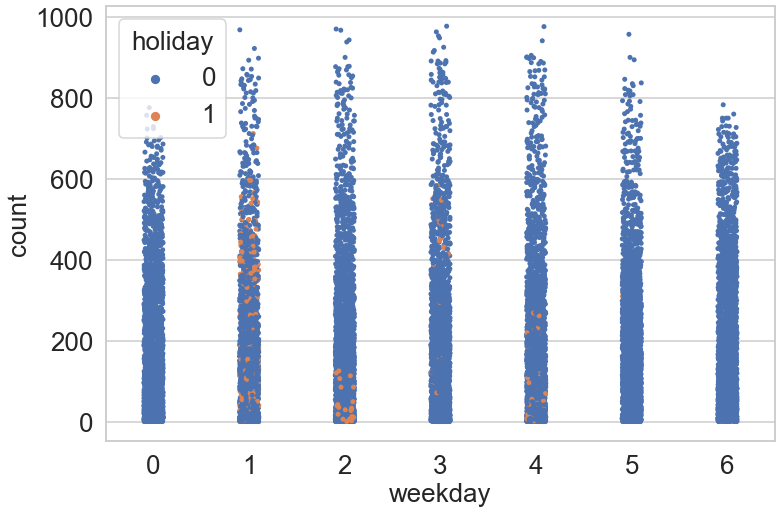

In [16]:
sns.stripplot(x='weekday', y='count', data=df, hue='holiday')
plt.show()

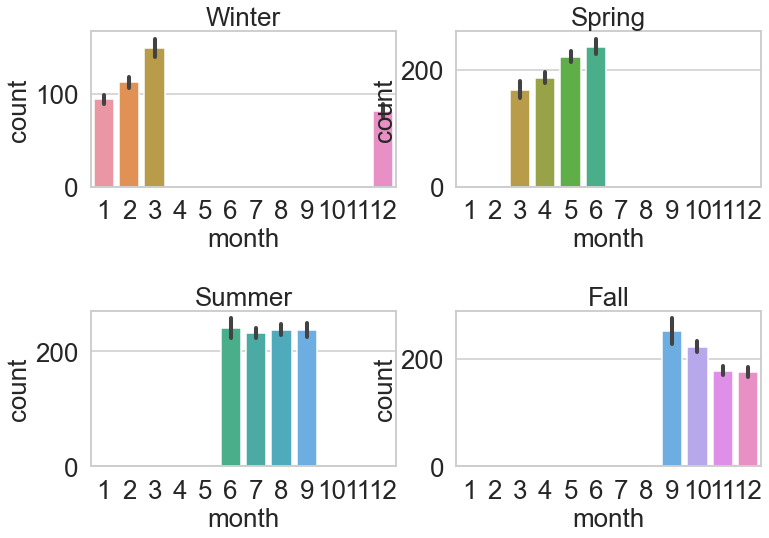

In [17]:
df_seasonal=['month','weekday','count']
plot_list=['month','count']

winter=df[df.season==1][df_seasonal]
spring=df[df.season==2][df_seasonal]
summer=df[df.season==3][df_seasonal]
fall=df[df.season==4][df_seasonal]

fig,ax=plt.subplots(nrows=2, ncols=2)


sns.barplot(data=winter[plot_list], x='month', y='count', ax=ax[0][0])
ax[0][0].set_title('Winter')

sns.barplot(data=spring[plot_list], x='month', y='count', ax=ax[0][1])
ax[0][1].set_title('Spring')




sns.barplot(data=summer[plot_list], x='month', y='count', ax=ax[1][0])
ax[1][0].set_title('Summer')

sns.barplot(data=fall[plot_list], x='month', y='count', ax=ax[1][1])
ax[1][1].set_title('Fall')


plt.subplots_adjust(hspace = 0.8)
plt.show()








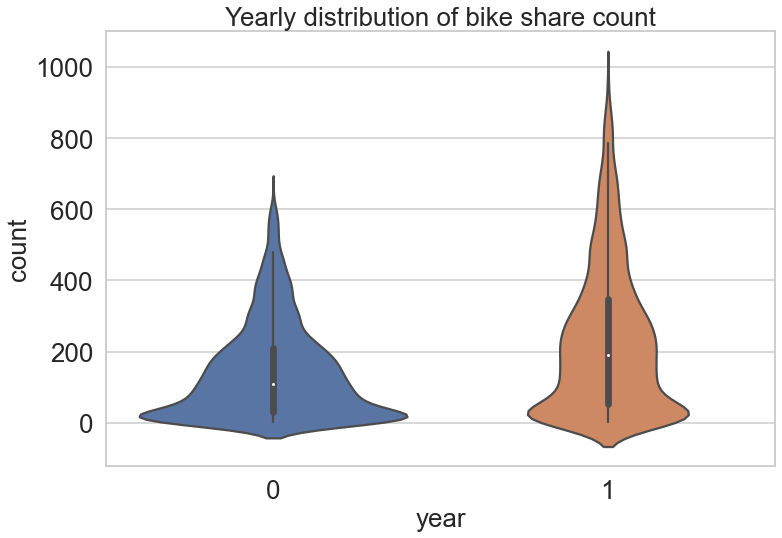

In [18]:
sns.violinplot(data=df[['year', 'count']],
              x='year', y='count')

plt.title('Yearly distribution of bike share count')
plt.show()

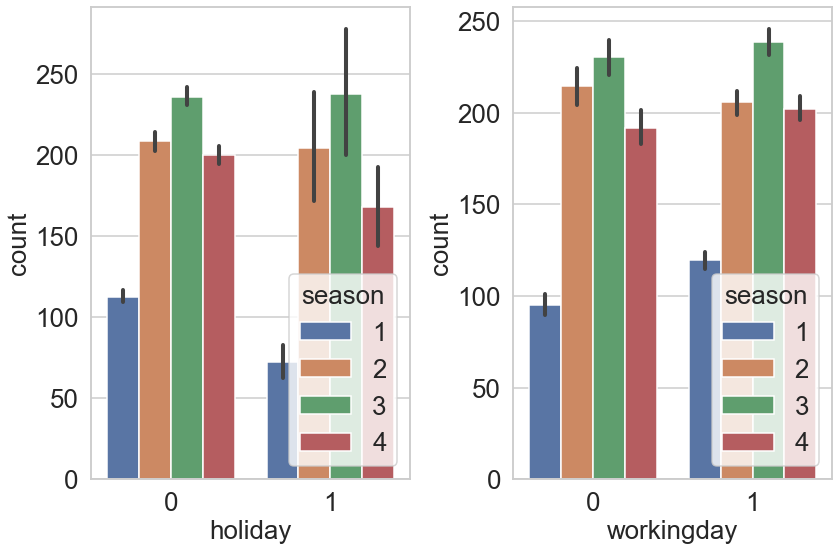

In [19]:
fig,(ax1,ax2)=plt.subplots(ncols=2)

sns.barplot(data=df, x='holiday', y='count', hue='season', ax=ax1)

sns.barplot(x='workingday', y='count', hue='season', data=df, ax=ax2)

plt.tight_layout()

plt.show()

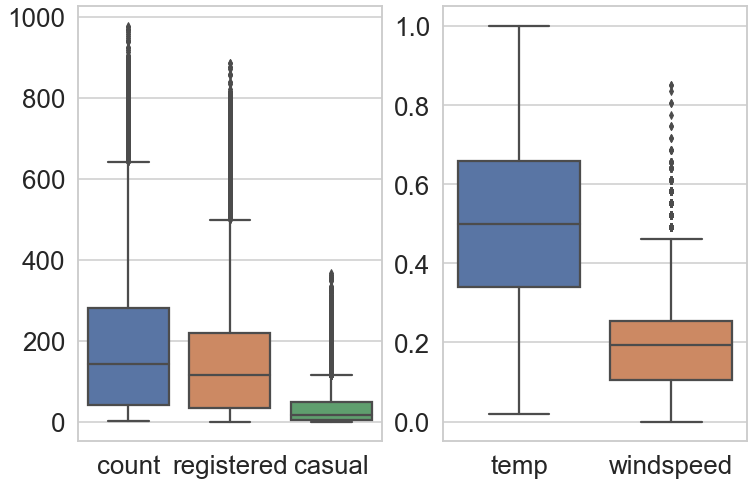

In [20]:
fig, (ax1,ax2)=plt.subplots(ncols=2)

sns.boxplot(data=df[['count','registered','casual']], ax=ax1)

sns.boxplot(data=df[['temp','windspeed']], ax=ax2)

plt.show()

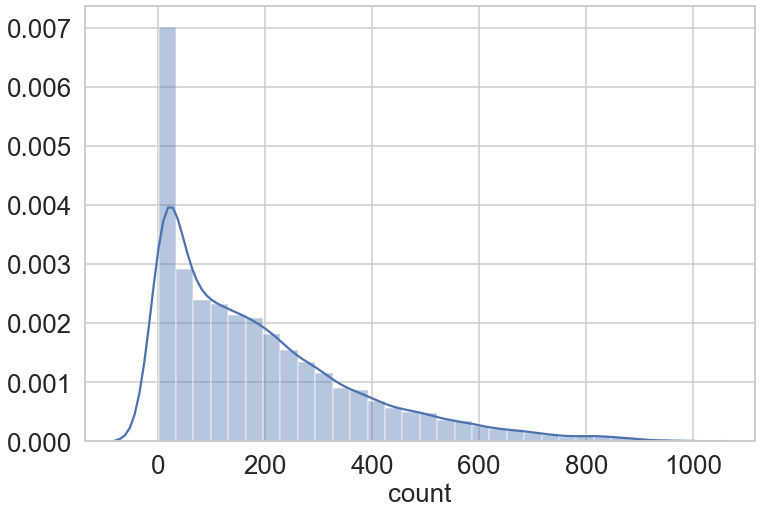

In [21]:
sns.distplot(df['count'], bins=30)

plt.show()

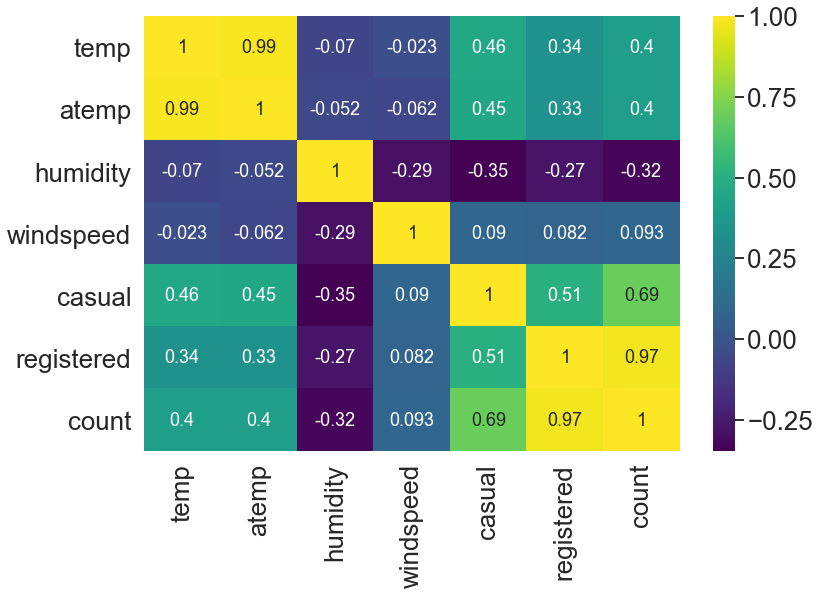

In [25]:
df_corr=df[['temp','atemp','humidity', 'windspeed','casual','registered','count']].corr()


sns.heatmap(df_corr, annot=True,cmap='viridis')

plt.show()

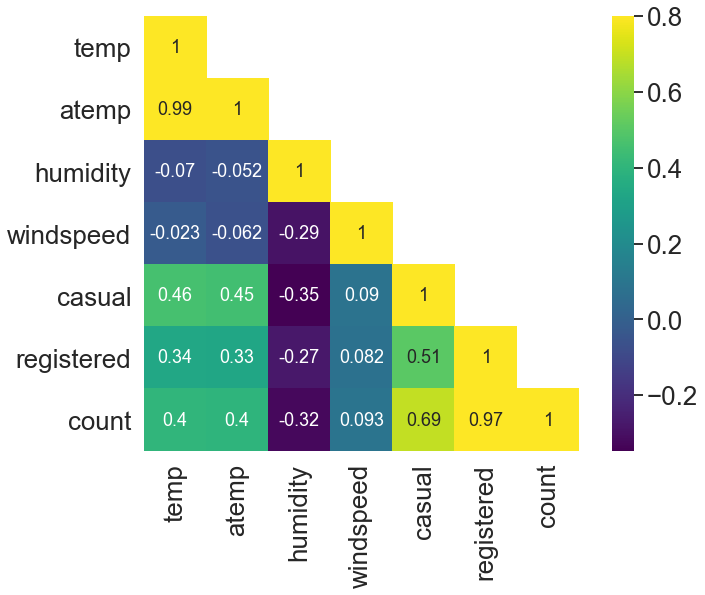

In [26]:

mask=np.array(df_corr)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(df_corr, annot=True,mask=mask, vmax=.8, square=True, cmap='viridis')

plt.show()

In [27]:
df.drop('id', axis=1, inplace=True)

KeyError: "['id'] not found in axis"

In [30]:
df.windspeed.value_counts()

0.0000    2180
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
0.2239    1513
0.0896    1425
0.2537    1295
0.2836    1048
0.2985     808
0.3284     602
0.3582     460
0.3881     381
0.4179     296
0.4478     176
0.4627     146
0.4925     112
0.5224      84
0.5821      44
0.5522      39
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.8507       2
0.8060       2
0.7463       2
0.7164       2
0.7761       1
0.8358       1
Name: windspeed, dtype: int64

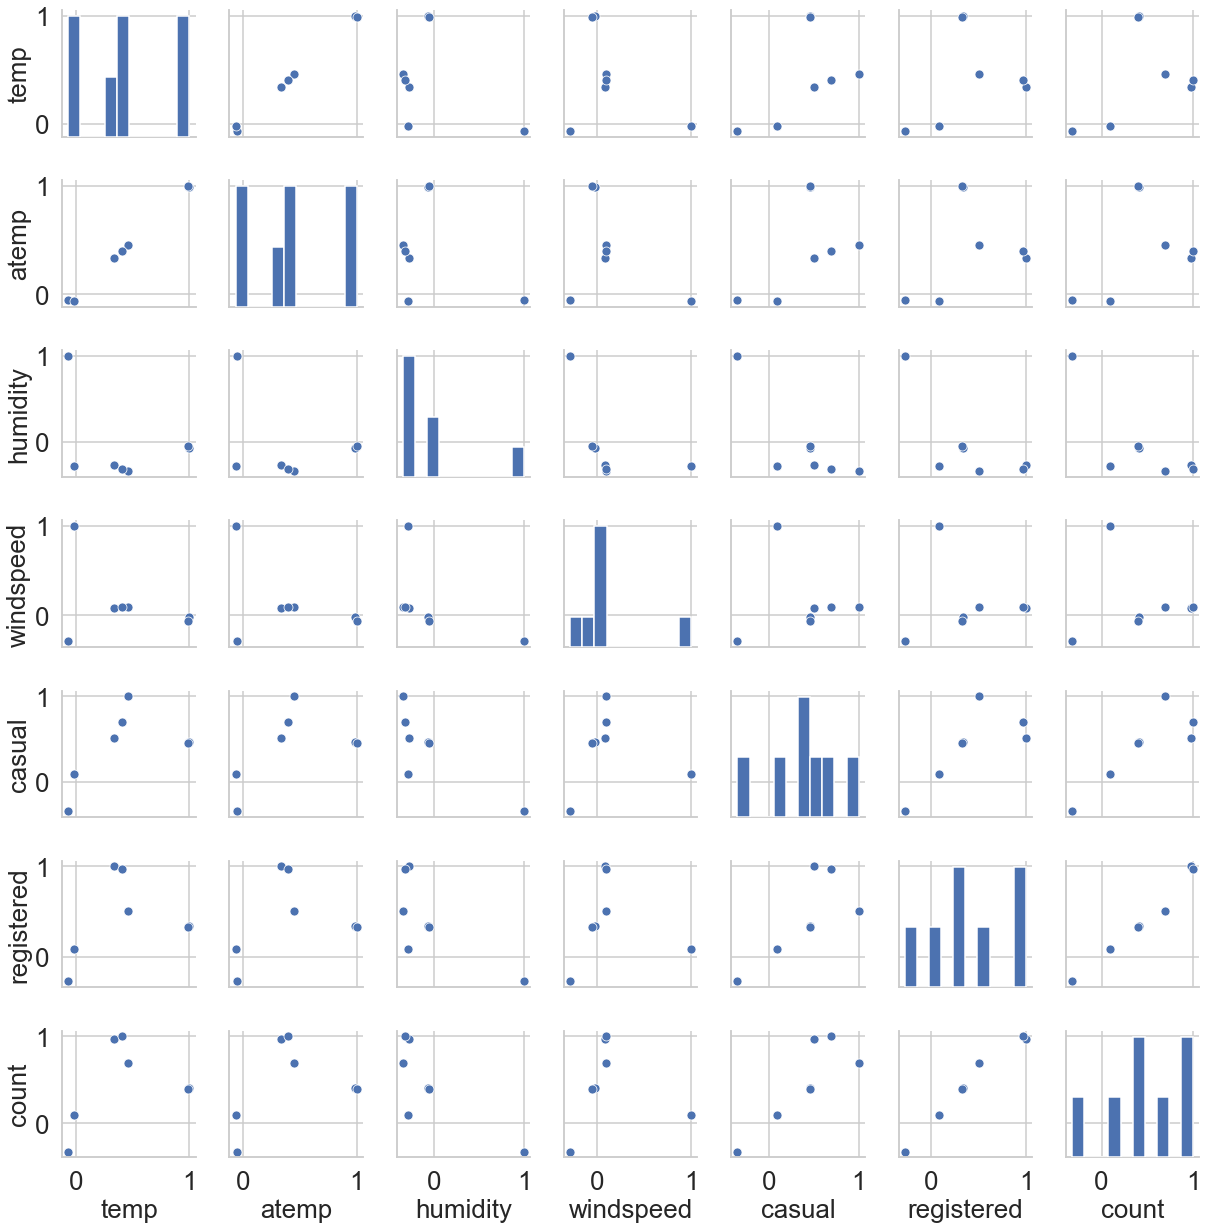

In [25]:
sns.pairplot(df_corr)
plt.show()

In [31]:
df.drop(['date','atemp','casual','registered'], axis=1, inplace=True)

In [32]:
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,humidity,windspeed,count
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [33]:
ef=pd.get_dummies(df[['season','weather_cond','workingday','holiday']] , drop_first=True)

In [34]:
ef.head()

,season_2,season_3,season_4,weather_cond_2,weather_cond_3,weather_cond_4,workingday_1,holiday_1
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [35]:
df=pd.concat([df,ef], axis=1)

In [36]:
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_cond_2,weather_cond_3,weather_cond_4,workingday_1,holiday_1
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,0,0,0,0,0,0,0,0
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,0,0,0,0,0,0,0,0
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,0,0,0,0,0,0,0,0
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,0,0,0,0,0,0,0,0
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,0,0,0,0,0,0,0,0


In [37]:
df.drop(['season', 'weather_cond','workingday','holiday'], axis=1, inplace=True)

In [38]:
df.head()

,year,month,hour,weekday,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_cond_2,weather_cond_3,weather_cond_4,workingday_1,holiday_1
0,0,1,0,6,0.24,0.81,0.0,16,0,0,0,0,0,0,0,0
1,0,1,1,6,0.22,0.80,0.0,40,0,0,0,0,0,0,0,0
2,0,1,2,6,0.22,0.80,0.0,32,0,0,0,0,0,0,0,0
3,0,1,3,6,0.24,0.75,0.0,13,0,0,0,0,0,0,0,0
4,0,1,4,6,0.24,0.75,0.0,1,0,0,0,0,0,0,0,0


In [39]:
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict


In [40]:
X=df.drop('count',axis=1)
y=df[['count']]

In [41]:
X.head()

,year,month,hour,weekday,temp,humidity,windspeed,season_2,season_3,season_4,weather_cond_2,weather_cond_3,weather_cond_4,workingday_1,holiday_1
0,0,1,0,6,0.24,0.81,0.0,0,0,0,0,0,0,0,0
1,0,1,1,6,0.22,0.80,0.0,0,0,0,0,0,0,0,0
2,0,1,2,6,0.22,0.80,0.0,0,0,0,0,0,0,0,0
3,0,1,3,6,0.24,0.75,0.0,0,0,0,0,0,0,0,0
4,0,1,4,6,0.24,0.75,0.0,0,0,0,0,0,0,0,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)




print("Training set::{}{}".format(X_train.shape,y_train.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(13903, 15)(13903, 1)
Testing set::(3476, 15)


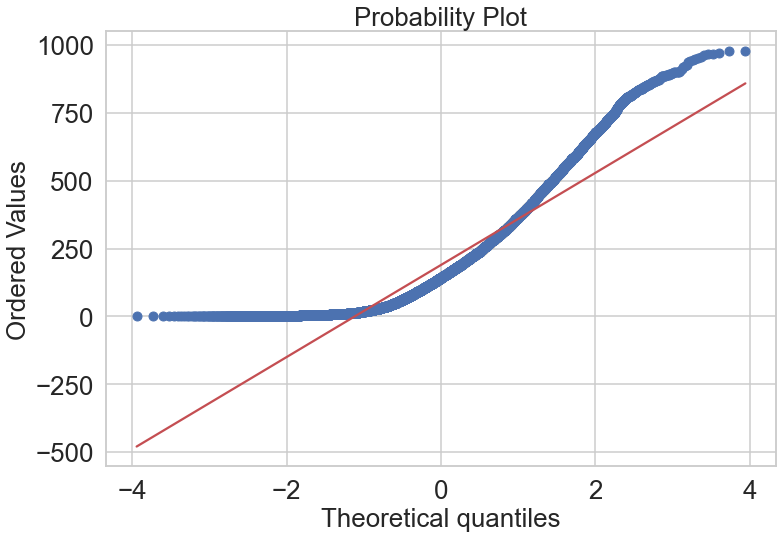

In [45]:
stats.probplot(y['count'] , dist="norm", plot=plt)
plt.show()

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm= LinearRegression()

In [48]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
predictions = lm.predict(X_test)

In [50]:
print(lm.intercept_)

[-23.9522026]


In [51]:
lm.coef_

array([[  81.25780763,    0.20944265,    7.51041293,    1.82594216,
         353.67034013, -191.19307208,   22.20963269,   20.20171043,
          -7.86380086,   63.8739437 ,    7.83973814,  -26.70891012,
          41.08291618,    2.90725064,  -27.2078391 ]])

In [53]:
cdf = pd.DataFrame(list(lm.coef_), columns=X.columns)

cdf

,year,month,hour,weekday,temp,humidity,windspeed,season_2,season_3,season_4,weather_cond_2,weather_cond_3,weather_cond_4,workingday_1,holiday_1
0,81.257808,0.209443,7.510413,1.825942,353.67034,-191.193072,22.209633,20.20171,-7.863801,63.873944,7.839738,-26.70891,41.082916,2.907251,-27.207839


In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))




MAE: 103.81067739153896
MSE: 19043.527551291892
RMSE: 137.9982882187018


In [55]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lm.score(X,y)

0.39829990254801595

In [57]:
metrics.explained_variance_score(y_test, predictions)

0.3990932774878019

In [58]:
lm.score(X_train,y_train)

0.3981155229443428

In [62]:
scores = cross_val_score(lm, X_train, y_train, cv=5)


In [63]:
print(scores)

[0.410014   0.37650843 0.40098174 0.39176537 0.40530281]


In [66]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

print(scores)

[-19033.62741823 -20236.6671467  -19348.07785174 -21344.23537084
 -20133.34947161]


In [67]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=6)

knn.fit(X_train,y_train)

pred1 = knn.predict(X_test)

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))



MAE: 34.41556386651323
MSE: 2998.760412671014
RMSE: 54.76093874899347


In [69]:
scores = cross_val_score(knn, X_train, y_train,scoring='neg_mean_squared_error', cv=5)
print(scores)

[-3218.28307164 -3847.82218626 -3630.44307603 -3565.61279976
 -3687.16067146]


In [72]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()


In [73]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [74]:
pred2 = rf.predict(X_test)

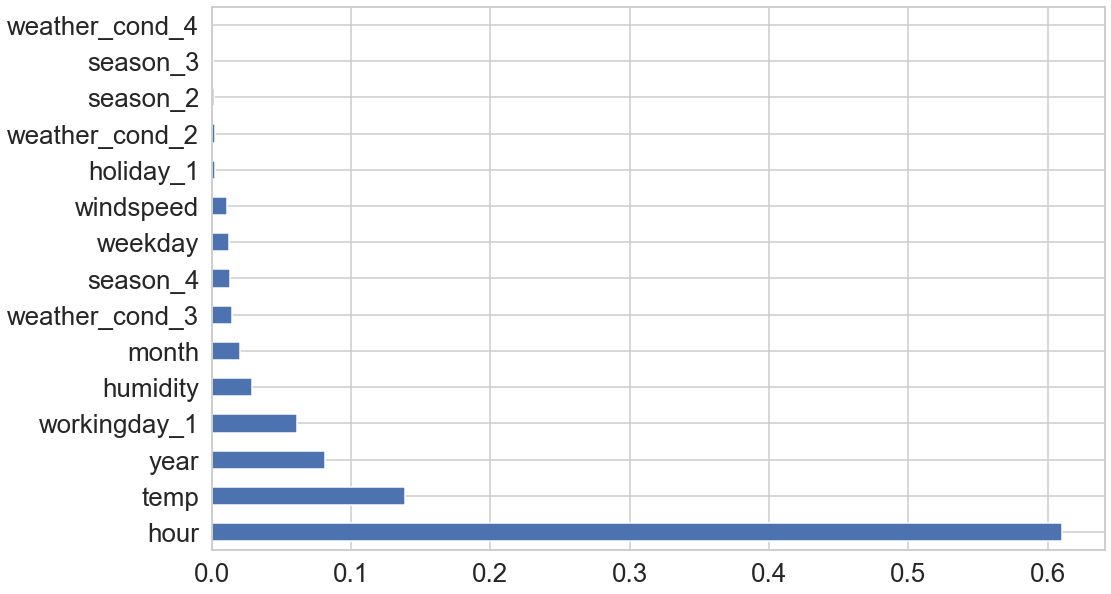

In [75]:
plt.figure(figsize=(16, 10))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2
                                                )))

MAE: 24.882110088224014
MSE: 1805.9061310399404
RMSE: 42.49595429026086


# Decision Tree 

In [77]:
import pydotplus 
from sklearn import tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV




In [78]:
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [79]:
dtr.score(X_test,y_test)

0.5615009873579435

In [80]:
pred3=dtr.predict(X_test)

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, pred3))
print('MSE:', metrics.mean_squared_error(y_test, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred3
                                                )))

MAE: 82.65016668839058
MSE: 13885.251605940855
RMSE: 117.83569750267046


In [82]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
              }

In [83]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [84]:
grid_cv_dtr.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

In [ ]:
df_1= pd.DataFrame(data=grid_cv_dtr.cv_results_)
df_1.head()

In [ ]:
fig,ax = plt.subplots()
sn.pointplot(data=df_1[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

In [ ]:
pred4 = best_dtr_model.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred4))
print('MSE:', metrics.mean_squared_error(y_test, pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred4
                                                )))

In [90]:
from sklearn.svm import SVR

model = SVR()



In [91]:
model.fit(X_train,y_train)



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [92]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

In [93]:
pred5=model.predict(X_test)

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, pred5))
print('MSE:', metrics.mean_squared_error(y_test, pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred5
                                                )))

MAE: 91.49350567185652
MSE: 20191.902255375328
RMSE: 142.0982134137348
